# Part 1:

In [4]:
import numpy as np                
import scipy.stats as sts           
import pandas as pd                 
import matplotlib.pyplot as plt    
import seaborn as sns  
import math 
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [5]:
#Import the data
marketing_data = pd.read_csv("marketing_data.csv", header=None)

In [6]:
marketing_data

,0,1,2
0,83.689,7.015300,51.503
1,81.268,0.000000,0.000
2,78.911,0.000000,0.000
3,77.005,11.568000,0.000
4,74.772,0.000000,0.000
...,...,...,...
2438,54.604,0.000000,0.000
2439,53.049,0.000000,0.000
2440,51.521,0.000000,0.000
2441,67.118,0.000055,44.673


In [7]:
np.sum(marketing_data[0]) #sales

162861.05

In [8]:
np.sum(marketing_data[[1,2]]) #expenditures

1    13779.478384
2    12748.691232
dtype: float64

In [9]:
#rename columns
marketing_data = marketing_data.rename(columns={0:"Sales", 1:"Google", 2:"YT"}) 
marketing_data


,Sales,Google,YT
0,83.689,7.015300,51.503
1,81.268,0.000000,0.000
2,78.911,0.000000,0.000
3,77.005,11.568000,0.000
4,74.772,0.000000,0.000
...,...,...,...
2438,54.604,0.000000,0.000
2439,53.049,0.000000,0.000
2440,51.521,0.000000,0.000
2441,67.118,0.000055,44.673


## Question 1

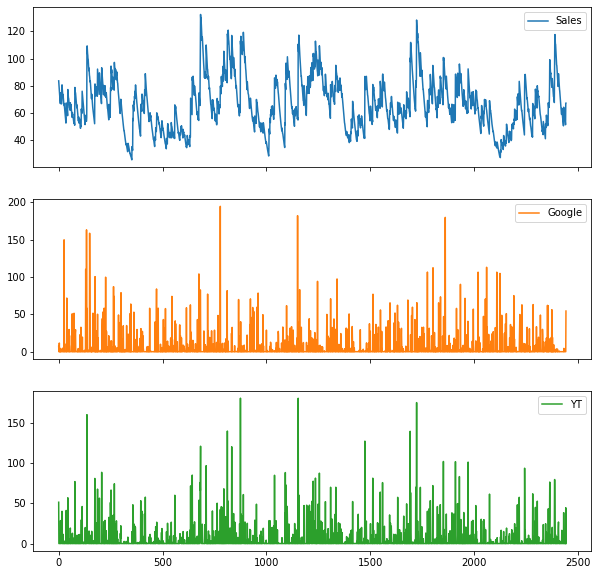

In [10]:
#Plot Sales, Google- and YT search expenditures
marketing_data.plot(subplots=True, figsize=(10,10))
plt.show()



## Question 2

In [11]:
#Least Squares Function
def least_squares(theta, T=len(marketing_data)):
    
    #transform parameter vector theta with link functions to impose restrictions
    mu     = np.exp(theta[0])  #to ensure >0
    phi1   = np.exp(theta[1])
    phi2   = np.exp(theta[2])
    delta1 = np.exp(theta[3])/(1+np.exp(theta[3]))  #to ensure >0 and <1
    delta2 = np.exp(theta[4])/(1+np.exp(theta[4]))
    alpha1 = np.exp(theta[5])
    alpha2 = np.exp(theta[6])
    beta1  = np.exp(theta[7])/(1+np.exp(theta[7]))
    beta2  = np.exp(theta[8])/(1+np.exp(theta[8]))
             
    
    gads   = np.zeros(T)
    yads   = np.zeros(T)
    gads[0]= 0
    yads[0]= 0
  
    s  = marketing_data.Sales
    g  = marketing_data.Google
    y  = marketing_data.YT
    
    
    for t in range(1,T):
        gads[t] = beta1*gads[t-1] + alpha1*g[t]
        yads[t] = beta2*yads[t-1] + alpha2*y[t]
        
        
        ls_function = s[t] - mu - phi1*(gads[t]**delta1) - phi2*(yads[t]**delta2)
        
    return 1/T*np.sum(ls_function**2)



In [12]:
#initial parameter values
mu_ini     = 1
phi1_ini   = 1
phi2_ini   = 1
delta1_ini = 0.5
delta2_ini = 0.5
alpha1_ini = 5
alpha2_ini = 5
beta1_ini  = 0.9
beta2_ini   = 0.9
 
#use inverse of link functions
theta_ini = np.array([np.log(mu_ini),
                      np.log(phi1_ini),
                      np.log(phi2_ini),
                      np.log(delta1_ini/(1-delta1_ini)),
                      np.log(delta2_ini/(1-delta2_ini)),
                      np.log(alpha1_ini),
                      np.log(alpha2_ini),
                      np.log(beta1_ini/(1-beta1_ini)),
                      np.log(beta2_ini/(1-beta2_ini))])
                    





                     
                                                          
                                                          
                                                           

In [13]:
#Now, optimize 
results = scipy.optimize.minimize(least_squares, theta_ini, method='BFGS')
print(f'parameter estimates:')
print(f'')
print(f"mu     : {np.exp(results.x[0])}")
print(f"phi1   : {np.exp(results.x[1])}")
print(f"phi2   : {np.exp(results.x[2])}")
print(f"delta1 : {np.exp(results.x[3])/(1+np.exp(results.x[3]))}")
print(f"delta2 : {np.exp(results.x[4])/(1+np.exp(results.x[4]))}")
print(f"alpha1 : {np.exp(results.x[5])}")
print(f"alpha2 : {np.exp(results.x[6])}")
print(f"beta1  : {np.exp(results.x[7])/(1+np.exp(results.x[7]))}")
print(f"beta2  : {np.exp(results.x[8])/(1+np.exp(results.x[8]))}")

print(f'')
print(f'')

print('ls function value')
print(results.fun)
print('exit flag:')
print(results.success)
print('message:')
print(results.message)

parameter estimates:

mu     : 1.008456300186073
phi1   : 1.2123629738843407
phi2   : 1.2263800533740412
delta1 : 0.5675232856840171
delta2 : 0.5724354620538087
alpha1 : 5.54512831093186
alpha2 : 5.582162877907512
beta1  : 0.9005155712435374
beta2  : 0.9054026148205889


ls function value
2.9124716295486805e-12
exit flag:
True
message:
Optimization terminated successfully.


In [14]:
#As mentioned in pdf file, small differences can produce vastly different point estimates. method to 'Neld
#Changing the optimization method to 'Nelder-Mead' for example gives very different point estimates.
#As we are not sure of the correctness of the parameters,
#We use parameter values given in PDF file for remainder of questions

## Question 3

Adstocks for Google and YT


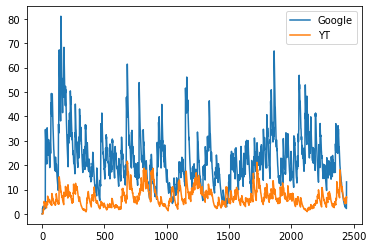

In [15]:
#parameter values (given in  Assignment Instructions PDF file)
mu, phi1, phi2, delta1, delta2, alpha1, alpha2, beta1, beta2, = (0.617,2.88,19.51,0.27,0.60,0.203,0.065,0.949,0.95)

#Google and YT adstock
T=len(marketing_data)
gads   = np.zeros(T)
yads   = np.zeros(T)
gads[0]= 0
yads[0]= 0

g  = marketing_data.Google
y  = marketing_data.YT

for t in range(1,T):
        gads[t] = beta1*gads[t-1] + alpha1*g[t]
        yads[t] = beta2*yads[t-1] + alpha2*y[t]
        

plt.plot(gads, label='Google')
plt.plot(yads, label='YT ')
plt.legend()
print('Adstocks for Google and YT')
plt.show()



## Question 4

# Part 2:

## Question 9

In [16]:
import numpy as np                
import scipy.stats as sts           
import pandas as pd                 
import matplotlib.pyplot as plt    
import seaborn as sns  
import math 
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [17]:
#Import the data
pricing_data = pd.read_csv("pricing_data.csv")
pricing_data

,s,p,m,c
0,44001,400.27,166.67,350
1,44027,400.27,211.00,350
2,44015,400.27,407.00,350
3,44039,400.27,380.00,350
4,44017,400.27,375.00,350
...,...,...,...,...
754,44179,400.00,1386.00,315
755,44170,400.00,1940.00,315
756,44207,400.00,1650.00,322
757,44183,400.00,1426.00,322


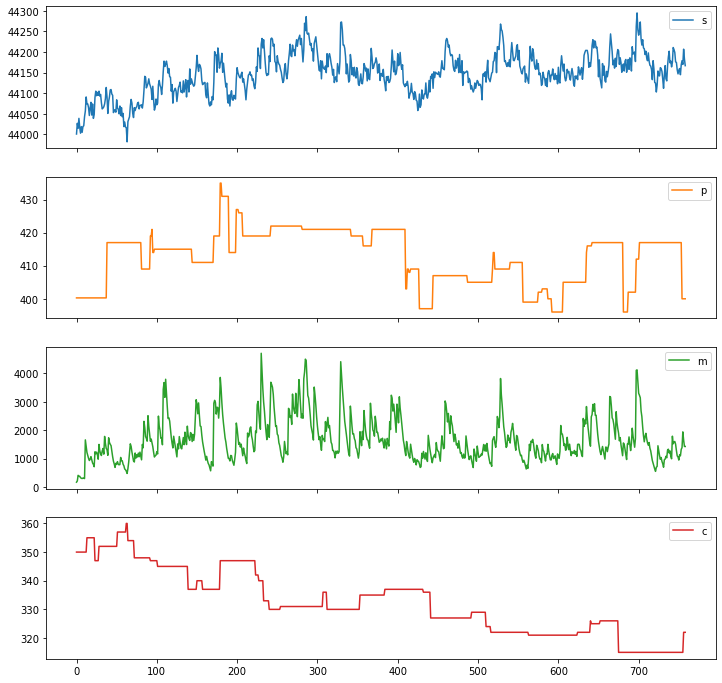

In [18]:
#Plot Sales, Price, Acquistion Costs, Marketing Expenditures
pricing_data.plot(subplots=True, figsize=(12,12))
plt.show()

## Question 10

In [19]:
#Regression of sales (S) on prices (P)
p = pricing_data['p'].values.reshape(-1, 1)
s = pricing_data['s'].values.reshape(-1, 1)

reg = LinearRegression().fit(p, s)

print(f"R-squared: {reg.score(p, s)}")
print(f"alpha: {reg.intercept_}")
print(f"beta: {reg.coef_}")


R-squared: 0.055613025696071516
alpha: [43551.24566696]
beta: [[1.44271762]]


## Question 13

In [20]:
#First, regression of prices (P) on costs (c)
c = pricing_data['c'].values.reshape(-1, 1)
p = pricing_data['p'].values.reshape(-1, 1)

reg2 = LinearRegression().fit(c, p)


print(f"alpha: {reg2.intercept_}")
print(f"beta: {reg2.coef_}")


alpha: [365.38097181]
beta: [[0.14240468]]


In [21]:
#Then, use coefficients to make p_hat
T=len(pricing_data)
p_hat   = np.zeros(T)

for t in range(0,T):
    p_hat[t] = reg2.intercept_ + reg2.coef_* pricing_data.c[t]

In [22]:
#Now use p_hat instead of p as Question 10:

#Regression of sales (S) on predicted_prices (p_hat)
p_hat = p_hat.reshape(-1, 1)
s = pricing_data['s'].values

reg3 = LinearRegression().fit(p_hat, s)

print(f"R-squared: {reg3.score(p_hat, s)}")
print(f"alpha: {reg3.intercept_}")
print(f"beta: {reg3.coef_}") 

R-squared: 0.38890250741987087
alpha: 52000.35488645842
beta: [-19.02861005]


## Question 15

In [23]:
#Regression of sales (S) on predicted_prices (p_hat) & marketing expenditures (m)
pricing_data['p_hat'] = p_hat
x= pricing_data[['p_hat', 'm']]
s = pricing_data['s']

reg4 = LinearRegression()
reg4.fit(x, s)

print(f"R-squared: {reg4.score(x, s)}")
print(f"alpha: {reg4.intercept_}")
print(f"beta: {reg4.coef_[0]}") 
print(f"psi: {reg4.coef_[1]}")


R-squared: 0.8475074463299253
alpha: 51265.64175503796
beta: -17.429217624916244
psi: 0.044894037373394174


## Question 16

In [24]:
T=len(pricing_data)
alpha = reg4.intercept_
beta  = reg4.coef_[0]
psi   = reg4.coef_[1]

p = pricing_data['p']
m = pricing_data['m']
c = pricing_data['c']

exp_profit = np.zeros(T)

for t in range(0,T):
    exp_profit[t] = (alpha + beta*p[t] + psi*m[t]) * (p[t]-c[t])

In [25]:
#Lets take the profit at the last observed values in the sample. 
print(f'profit before increasing the price :  {exp_profit[T-1]}')

#If we now increase the price by one unit:
t=T-1
print(f'profit after increasing the price  :  {(alpha + beta*(p[t]+1) + psi*m[t]) * ((p[t]+1)-c[t])}')


#As profits go up by increasing the price with one unit, we advise to increase the price.

profit before increasing the price :  3459918.4392496273
profit after increasing the price  :  3502899.459765587
